In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


In [38]:
df = pd.read_csv("telecom.csv")
df

,ID,Subscription length,Charge amount,Seconds of use,Frequency of use,Frequency of SMS,Distinct called numbers,Call failures,Tariff plan,Status,Age group,Complaints,Churn
0,1,35,0,1420,41,36,20,1,A,Active,30-40,N,0
1,2,28,0,920,32,20,12,7,A,Active,Under 30,N,0
2,3,40,0,88,6,8,6,0,A,Inactive,30-40,N,1
3,4,38,0,13963,170,9,47,9,A,Active,30-40,N,0
4,5,38,0,13773,169,0,44,7,A,Active,30-40,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,3146,33,0,0,0,0,0,0,A,Inactive,Under 30,N,0
3146,3147,37,0,1370,40,24,7,5,A,Inactive,30-40,N,0
3147,3148,34,7,10320,88,3,43,18,A,Active,Over 40,N,0
3148,3149,23,0,1110,27,21,14,7,A,Active,Under 30,N,0


In [39]:
df = df.drop(columns=['ID', 'Tariff plan', 'Status', 'Age group'])
df

,Subscription length,Charge amount,Seconds of use,Frequency of use,Frequency of SMS,Distinct called numbers,Call failures,Complaints,Churn
0,35,0,1420,41,36,20,1,N,0
1,28,0,920,32,20,12,7,N,0
2,40,0,88,6,8,6,0,N,1
3,38,0,13963,170,9,47,9,N,0
4,38,0,13773,169,0,44,7,N,0
...,...,...,...,...,...,...,...,...,...
3145,33,0,0,0,0,0,0,N,0
3146,37,0,1370,40,24,7,5,N,0
3147,34,7,10320,88,3,43,18,N,0
3148,23,0,1110,27,21,14,7,N,0


In [40]:
df['Complaints'] = df['Complaints'].map({'N': 0, 'Y': 1})
df

,Subscription length,Charge amount,Seconds of use,Frequency of use,Frequency of SMS,Distinct called numbers,Call failures,Complaints,Churn
0,35,0,1420,41,36,20,1,0,0
1,28,0,920,32,20,12,7,0,0
2,40,0,88,6,8,6,0,0,1
3,38,0,13963,170,9,47,9,0,0
4,38,0,13773,169,0,44,7,0,0
...,...,...,...,...,...,...,...,...,...
3145,33,0,0,0,0,0,0,0,0
3146,37,0,1370,40,24,7,5,0,0
3147,34,7,10320,88,3,43,18,0,0
3148,23,0,1110,27,21,14,7,0,0


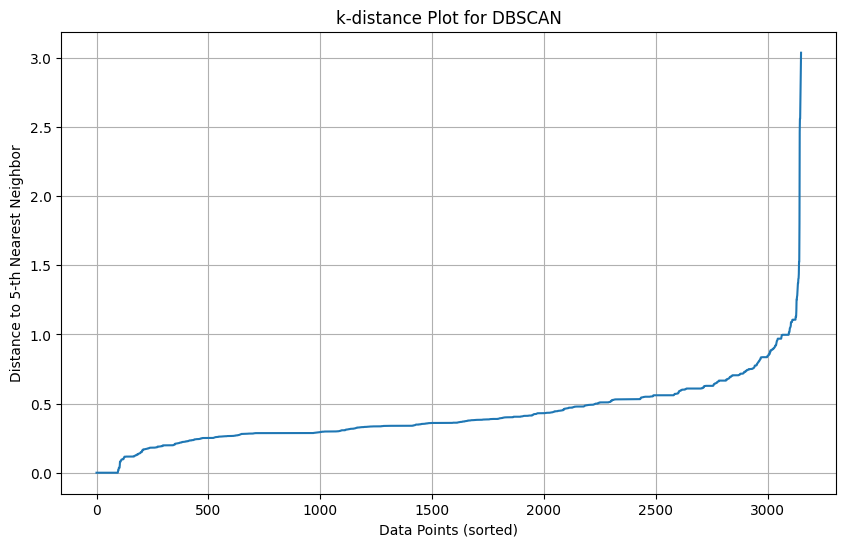

In [41]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop('Churn', axis=1)
X_scaled = StandardScaler().fit_transform(X)


k = 5 
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

k_distances = np.sort(distances[:, k - 1])

plt.figure(figsize=(10, 6))
plt.plot(k_distances)
plt.ylabel(f"Distance to {k}-th Nearest Neighbor")
plt.xlabel("Data Points (sorted)")
plt.title("k-distance Plot for DBSCAN")
plt.grid(True)
plt.show()

/Users/krishpatel/Documents/CMOR438/CMOR438/.venv/lib/python3.11/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/krishpatel/Documents/CMOR438/CMOR438/.venv/lib/python3.11/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/krishpatel/Documents/CMOR438/CMOR438/.venv/lib/python3.11/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


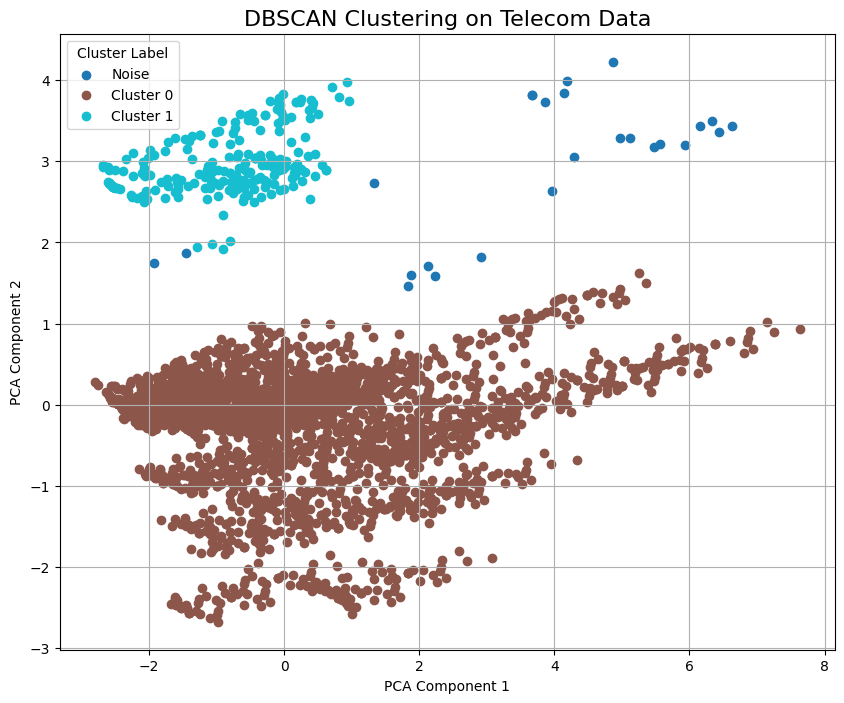

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

dbscan = DBSCAN(eps=0.4, min_samples=5) 
labels = dbscan.fit_predict(X_pca)

plt.figure(figsize=(10, 8))
unique_labels = np.unique(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for color, label in zip(colors, unique_labels):
    if label == -1:
        label_name = "Noise"
    else:
        label_name = f"Cluster {label}"
    plt.scatter(
        X_pca[labels == label, 0],
        X_pca[labels == label, 1],
        c=[color],
        label=label_name,
    )

plt.title("DBSCAN Clustering on Telecom Data", fontsize=16)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster Label")
plt.grid(True)
plt.show()

In [43]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

Estimated number of clusters: 2
Estimated number of noise points: 25
